#**Ten Categories**

## Setup

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


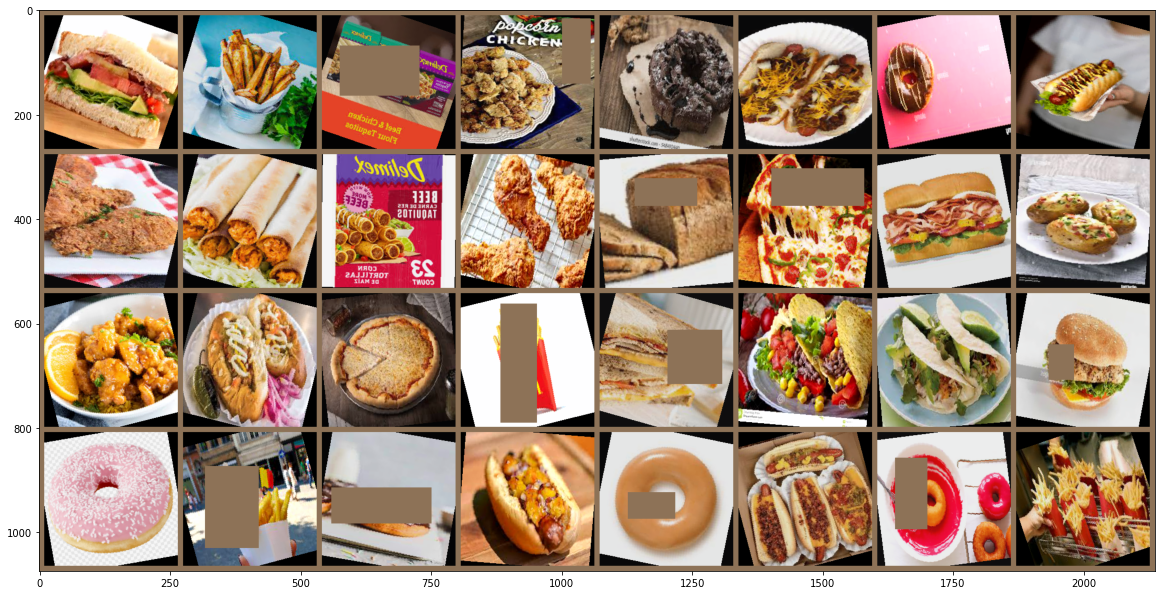

In [1]:
import os
import numpy as np
from tqdm import tqdm
import glob
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from  torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets


ROOT_PATH = './drive/MyDrive/comp6721-project/datasets/dataset-10/'
training_path = f'{ROOT_PATH}/train'
validation_path = f'{ROOT_PATH}/val'
evaluation_path = f'{ROOT_PATH}/test'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 10
batch_size = 32
image_size = 256
mean = [0.554, 0.450, 0.343]
std = [0.231, 0.241, 0.241]

main_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean,std)
])

aug_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.1,0.1,0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean,std),
    transforms.RandomErasing()
])

# Model
model = models.resnet18(pretrained=False)
in_features = int(model.fc.in_features)
model.fc = nn.Linear(in_features, num_classes, device)
model = model.to(device)

# Loss function & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
lr_scheduler = optim.lr_scheduler.StepLR(optimizer,step_size=5, gamma=0.1)

# Dataset
train_dataset = datasets.ImageFolder(training_path, transform=aug_transform)
evaluation_dataset = datasets.ImageFolder(evaluation_path, transform=main_transform)

train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True, num_workers=2)
evaluation_dataloader = DataLoader(evaluation_dataset, batch_size = batch_size, shuffle=False, num_workers=2)

# Image samples
images, targets = next(iter(train_dataloader))
grid_images = torchvision.utils.make_grid(images, nrow=8, padding=10)

def imshow(images, mean, std):
        np_image = np.array(images).transpose((1,2,0))
        unnorm_image = np_image * std + mean
        plt.figure(figsize=(20,20))
        plt.imshow(unnorm_image)
        
imshow(grid_images, mean, std)

## Training

In [2]:
%%time

num_epochs = 15
losses = []

for epoch in range(num_epochs):
    for i , (inputs, targets) in enumerate(train_dataloader):
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        #train model
        outputs = model(inputs)
        
        #criterion
        loss = criterion(outputs, targets)
        losses.append(loss.item())
        
        #backward
        optimizer.zero_grad()
        loss.backward()
        
        #update parameters
        optimizer.step()
        
        # report
        if (i + 1) % 50 == 0:
            print('Epoch [%2d/%2d], Step [%3d/%3d], Loss: %.4f'
                  % (epoch + 1, num_epochs, i + 1, len(train_dataset) // batch_size, loss.item()))


Epoch [ 1/15], Step [ 50/468], Loss: 2.3411
Epoch [ 1/15], Step [100/468], Loss: 2.1691


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [ 1/15], Step [150/468], Loss: 2.3834
Epoch [ 1/15], Step [200/468], Loss: 2.0167


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [ 1/15], Step [250/468], Loss: 2.0172
Epoch [ 1/15], Step [300/468], Loss: 2.0425
Epoch [ 1/15], Step [350/468], Loss: 1.9516
Epoch [ 1/15], Step [400/468], Loss: 2.0778
Epoch [ 1/15], Step [450/468], Loss: 1.8457
Epoch [ 2/15], Step [ 50/468], Loss: 1.9510
Epoch [ 2/15], Step [100/468], Loss: 1.6854
Epoch [ 2/15], Step [150/468], Loss: 1.7411
Epoch [ 2/15], Step [200/468], Loss: 1.9610
Epoch [ 2/15], Step [250/468], Loss: 1.9355
Epoch [ 2/15], Step [300/468], Loss: 1.7377


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [ 2/15], Step [350/468], Loss: 1.8250


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [ 2/15], Step [400/468], Loss: 1.7292
Epoch [ 2/15], Step [450/468], Loss: 1.5970


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [ 3/15], Step [ 50/468], Loss: 1.5071
Epoch [ 3/15], Step [100/468], Loss: 1.8645
Epoch [ 3/15], Step [150/468], Loss: 1.6268
Epoch [ 3/15], Step [200/468], Loss: 1.5749
Epoch [ 3/15], Step [250/468], Loss: 1.4725


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [ 3/15], Step [300/468], Loss: 1.7037
Epoch [ 3/15], Step [350/468], Loss: 1.6883
Epoch [ 3/15], Step [400/468], Loss: 1.5957
Epoch [ 3/15], Step [450/468], Loss: 1.4651


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [ 4/15], Step [ 50/468], Loss: 1.5933
Epoch [ 4/15], Step [100/468], Loss: 1.1039
Epoch [ 4/15], Step [150/468], Loss: 1.2886
Epoch [ 4/15], Step [200/468], Loss: 1.4023
Epoch [ 4/15], Step [250/468], Loss: 1.2990
Epoch [ 4/15], Step [300/468], Loss: 1.5235
Epoch [ 4/15], Step [350/468], Loss: 1.4566
Epoch [ 4/15], Step [400/468], Loss: 1.5938
Epoch [ 4/15], Step [450/468], Loss: 1.5480
Epoch [ 5/15], Step [ 50/468], Loss: 1.2401
Epoch [ 5/15], Step [100/468], Loss: 1.3169


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [ 5/15], Step [150/468], Loss: 1.5954
Epoch [ 5/15], Step [200/468], Loss: 1.5560
Epoch [ 5/15], Step [250/468], Loss: 1.5104
Epoch [ 5/15], Step [300/468], Loss: 1.4839
Epoch [ 5/15], Step [350/468], Loss: 1.3976
Epoch [ 5/15], Step [400/468], Loss: 1.3122
Epoch [ 5/15], Step [450/468], Loss: 1.2135
Epoch [ 6/15], Step [ 50/468], Loss: 1.1395
Epoch [ 6/15], Step [100/468], Loss: 1.6190


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [ 6/15], Step [150/468], Loss: 1.1798
Epoch [ 6/15], Step [200/468], Loss: 1.3303
Epoch [ 6/15], Step [250/468], Loss: 1.3470
Epoch [ 6/15], Step [300/468], Loss: 1.2055


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [ 6/15], Step [350/468], Loss: 1.0407
Epoch [ 6/15], Step [400/468], Loss: 1.7030
Epoch [ 6/15], Step [450/468], Loss: 1.4817


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [ 7/15], Step [ 50/468], Loss: 0.9972
Epoch [ 7/15], Step [100/468], Loss: 1.6781
Epoch [ 7/15], Step [150/468], Loss: 1.3596
Epoch [ 7/15], Step [200/468], Loss: 1.4875
Epoch [ 7/15], Step [250/468], Loss: 1.6991


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [ 7/15], Step [300/468], Loss: 1.2423
Epoch [ 7/15], Step [350/468], Loss: 1.5488
Epoch [ 7/15], Step [400/468], Loss: 1.0172
Epoch [ 7/15], Step [450/468], Loss: 1.1392


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [ 8/15], Step [ 50/468], Loss: 1.1901
Epoch [ 8/15], Step [100/468], Loss: 1.1785
Epoch [ 8/15], Step [150/468], Loss: 1.1110
Epoch [ 8/15], Step [200/468], Loss: 1.2591
Epoch [ 8/15], Step [250/468], Loss: 1.2648
Epoch [ 8/15], Step [300/468], Loss: 1.2972


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [ 8/15], Step [350/468], Loss: 1.4082
Epoch [ 8/15], Step [400/468], Loss: 1.3919
Epoch [ 8/15], Step [450/468], Loss: 0.9898
Epoch [ 9/15], Step [ 50/468], Loss: 1.2005


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [ 9/15], Step [100/468], Loss: 1.2949
Epoch [ 9/15], Step [150/468], Loss: 1.0937
Epoch [ 9/15], Step [200/468], Loss: 1.1894
Epoch [ 9/15], Step [250/468], Loss: 0.8153
Epoch [ 9/15], Step [300/468], Loss: 1.0380
Epoch [ 9/15], Step [350/468], Loss: 1.2587
Epoch [ 9/15], Step [400/468], Loss: 0.9109


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [ 9/15], Step [450/468], Loss: 1.4742
Epoch [10/15], Step [ 50/468], Loss: 0.8540


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [10/15], Step [100/468], Loss: 0.9550
Epoch [10/15], Step [150/468], Loss: 0.9450
Epoch [10/15], Step [200/468], Loss: 1.0806
Epoch [10/15], Step [250/468], Loss: 1.3156
Epoch [10/15], Step [300/468], Loss: 1.1156


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [10/15], Step [350/468], Loss: 0.7791
Epoch [10/15], Step [400/468], Loss: 0.8543
Epoch [10/15], Step [450/468], Loss: 0.9009
Epoch [11/15], Step [ 50/468], Loss: 0.8401
Epoch [11/15], Step [100/468], Loss: 1.2713


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [11/15], Step [150/468], Loss: 1.2284
Epoch [11/15], Step [200/468], Loss: 1.2158
Epoch [11/15], Step [250/468], Loss: 1.1232
Epoch [11/15], Step [300/468], Loss: 1.3650
Epoch [11/15], Step [350/468], Loss: 1.1437
Epoch [11/15], Step [400/468], Loss: 0.6699
Epoch [11/15], Step [450/468], Loss: 1.1423
Epoch [12/15], Step [ 50/468], Loss: 1.0325
Epoch [12/15], Step [100/468], Loss: 1.0762
Epoch [12/15], Step [150/468], Loss: 0.7771
Epoch [12/15], Step [200/468], Loss: 1.2891


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [12/15], Step [250/468], Loss: 0.7344


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [12/15], Step [300/468], Loss: 1.1691
Epoch [12/15], Step [350/468], Loss: 1.0723
Epoch [12/15], Step [400/468], Loss: 1.0628
Epoch [12/15], Step [450/468], Loss: 0.8347
Epoch [13/15], Step [ 50/468], Loss: 0.6213
Epoch [13/15], Step [100/468], Loss: 0.8486


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [13/15], Step [150/468], Loss: 1.0871
Epoch [13/15], Step [200/468], Loss: 0.8218
Epoch [13/15], Step [250/468], Loss: 1.1042


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [13/15], Step [300/468], Loss: 0.9820
Epoch [13/15], Step [350/468], Loss: 1.1476
Epoch [13/15], Step [400/468], Loss: 0.9909
Epoch [13/15], Step [450/468], Loss: 0.6963
Epoch [14/15], Step [ 50/468], Loss: 1.2417
Epoch [14/15], Step [100/468], Loss: 1.0419
Epoch [14/15], Step [150/468], Loss: 1.5164


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [14/15], Step [200/468], Loss: 1.0594
Epoch [14/15], Step [250/468], Loss: 0.9777
Epoch [14/15], Step [300/468], Loss: 0.9365
Epoch [14/15], Step [350/468], Loss: 0.7247
Epoch [14/15], Step [400/468], Loss: 0.8026
Epoch [14/15], Step [450/468], Loss: 0.5269


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [15/15], Step [ 50/468], Loss: 0.9983
Epoch [15/15], Step [100/468], Loss: 0.8632
Epoch [15/15], Step [150/468], Loss: 0.9792
Epoch [15/15], Step [200/468], Loss: 0.7813
Epoch [15/15], Step [250/468], Loss: 1.0269
Epoch [15/15], Step [300/468], Loss: 1.3230
Epoch [15/15], Step [350/468], Loss: 1.0897


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [15/15], Step [400/468], Loss: 0.8327
Epoch [15/15], Step [450/468], Loss: 1.2946
CPU times: user 6min 56s, sys: 58.7 s, total: 7min 55s
Wall time: 1h 40min 46s


## Valuation

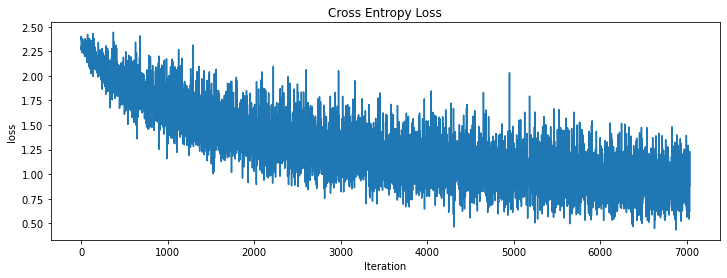

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train accuracy: 64.98
Test accuracy: 61.07
Confusion Matrix:
[[ 86   0   0   0   1   1   0   1   5   6]
 [  4 139   1  11  10   1   0   9  10  15]
 [  0   4  58   2   6   0   1   2   1  26]
 [  2   5   0 173   3   2   1   4   2   8]
 [  2   1   0   3  72   7   0   0   0  15]
 [ 10  12   1  18   6  93   0   7  26  27]
 [ 19   3   0   4  14  34  65  34  16  11]
 [  6  21   0   5   3   6   0 124   9  26]
 [  1   1   0   1   1   0   0   7  65  24]
 [  5   6   1   4   3   4   0   8  28  41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.86      0.73       100
           1       0.72      0.69      0.71       200
           2       0.95      0.58      0.72       100
           3       0.78      0.86      0.82       200
           4       0.61      0.72      0.66       100
           5       0.63      0.47      0.53       200
           6       0.97      0.33      0.49       200
           7       0.63      0.62      0.63       20

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


plt.figure(figsize=(12, 4))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('loss')
plt.title('Cross Entropy Loss')
plt.show()

def evaluate_model(title, model, dataloader, device):
    model.eval()  # for batch normalization layers
    corrects = 0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            corrects += (preds == targets.data).sum()
            y_true.extend(targets.tolist())
            y_pred.extend(preds.tolist())

    print('{title} accuracy: {:.2f}'.format(100. * corrects / len(dataloader.dataset), title=title))
    if title.lower() == "test":
        # Compute the confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        # Compute the precision, recall, and F1 score
        report = classification_report(y_true, y_pred)
        print('Confusion Matrix:')
        print(cm)
        print('Classification Report:')
        print(report)


evaluate_model("Train", model, train_dataloader, device)
evaluate_model("Test", model, evaluation_dataloader, device)